# Statistical Convergence Verification Case

## Convergence case for ...

This notebook runs a user set number of convergence cases and plots varisous flow properties to compare and verifiy the statistical convergence of the simulations.

In [1]:
%matplotlib inline

In [2]:
%config InlineBackend.figure_format = 'svg'

In [3]:
#First things first change to your working directory containing your HiPSTAR case
import os
os.chdir('/home/rp3e11/drive1/HPT/grid_convergence/R1/')

In [4]:
#Set up environemnt
import sys
#Append PLATUS libraries if these are not set in your PYTHONPATH 
import lib_hipstar as lh
import tools
import lines as l
import numpy as np
import matplotlib.pyplot as plt
from matplotlib2tikz import save as tikz_save
pdf=True
tikz=False

In [5]:
#use tools.sfiles to create list of intervals
tools.sfile_intervalls('Sfiles/','cascade_60.in',)

Timestep of simulation was  2e-05


In [6]:
#USER INPUT
#Set intervals to check for convergence
intv = [(1011000,1261000),
        (1111000,1161000),
        (1111000,1261000),
        (1211000,1261000)]

In [7]:
#Run the lib_hipstar runconvergence routine with your post pro input file and your compiled hipstar postpro program
case=lh.case('.','cascade_post.in')
case.runconvergence(intv,'post3d_stand_les.x')
#case.runconvergence(intv,'post3d_stand_les.x',exec_post=False)

this is case: ./
working on:
1011000_to_1261000 corresponding to 25.0time units
working on:
1111000_to_1161000 corresponding to 5.0time units
working on:
1111000_to_1261000 corresponding to 15.0time units
working on:
1211000_to_1261000 corresponding to 5.0time units


In [8]:
#get list of directories to loop though
postdir = os.listdir(case.postdir)
postdir = [case.postdir+'/'+i for i in postdir]

# Wake plots

Plot wake values of each statistics run and compare 

In [9]:
#USER INPUT
#Change if you want a different down stream plane
# Specify the down stream wake plane you want with [[x,y][x,y]] 
# add other planes by adding the same format
wp=[[[-.3,-0.2],[-.3,0.7]],[[0.9,-.75],[0.9,0.2]],[[1.1,-.75],[1.1,0.2]],[[1.26,-.75],[1.26,0.2]]]

In [10]:
#Extract lines from each convergence case
wake=[]
for j in wp:
    wake.append(l.lines())

    for i in postdir:
        d=i.split('/')
        d=d[-1]
        wake[-1].extr_line(j[0],j[1],200,i+'/STAT_cont.bin',force_read=True,label=d.replace('_',' '),periodic_y=[-1,1,0.59])
        wake[-1].order_ymin()
        #Calculate any extra needed variables

written out file is older than STAT file, interpolate from STAT file
Extracting line
Found 178 points.
written out file is older than STAT file, interpolate from STAT file
Extracting line
Found 178 points.
written out file is older than STAT file, interpolate from STAT file
Extracting line
Found 178 points.
written out file is older than STAT file, interpolate from STAT file
Extracting line
Found 178 points.
written out file is older than STAT file, interpolate from STAT file
Extracting line
Found 168 points.
written out file is older than STAT file, interpolate from STAT file
Extracting line
Found 168 points.
written out file is older than STAT file, interpolate from STAT file
Extracting line
Found 168 points.
written out file is older than STAT file, interpolate from STAT file
Extracting line
Found 168 points.
written out file is older than STAT file, interpolate from STAT file
Extracting line
Found 169 points.
written out file is older than STAT file, interpolate from STAT file
Extr

In [11]:
I_ind=wake[0].l[0].var.get_index(119,3)
p_ind=wake[0].l[0].var.get_index(101,5)
for i in range(len(wake[0].l)):
    wake[0].l[i].mass_ave_x()
    wake[0].l[i].area_ave()
    print 'Case ',wake[0].l[i].label
    print 'Pressure ',wake[0].l[i].mass_av[p_ind]
    print 'Turbulent intensity ', wake[0].l[i].mass_av[I_ind]


The mass flux through this line in 1 direction is  0.55278
Case  1111000 to 1161000
Pressure  12.8906831016
Turbulent intensity  0.0768731632493
The mass flux through this line in 1 direction is  0.55277
Case  1111000 to 1261000
Pressure  12.8821089542
Turbulent intensity  0.0772246499017
The mass flux through this line in 1 direction is  0.55235
Case  1011000 to 1261000
Pressure  12.8851037164
Turbulent intensity  0.0774506272053
The mass flux through this line in 1 direction is  0.55275
Case  1211000 to 1261000
Pressure  12.8735347229
Turbulent intensity  0.0775606548803


Wake profiles for x position:  -0.3
Wake profiles for x position:  0.9
Wake profiles for x position:  1.1
Wake profiles for x position:  1.26


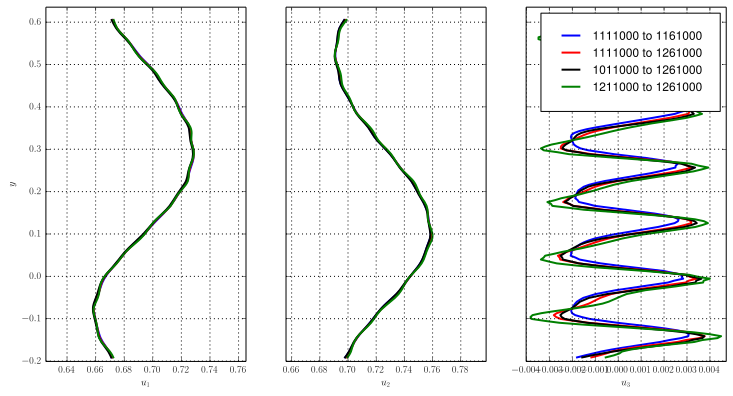

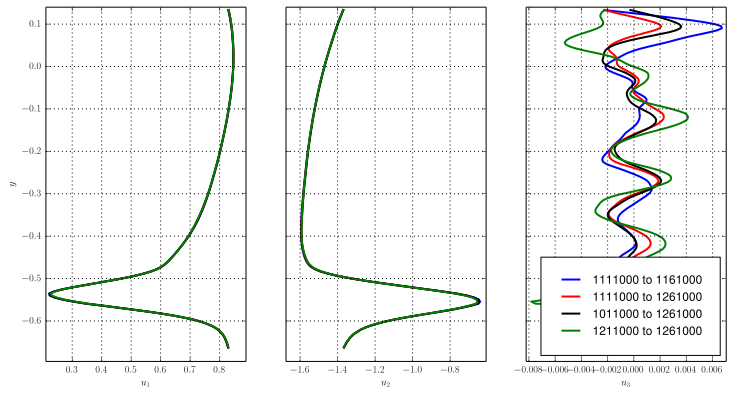

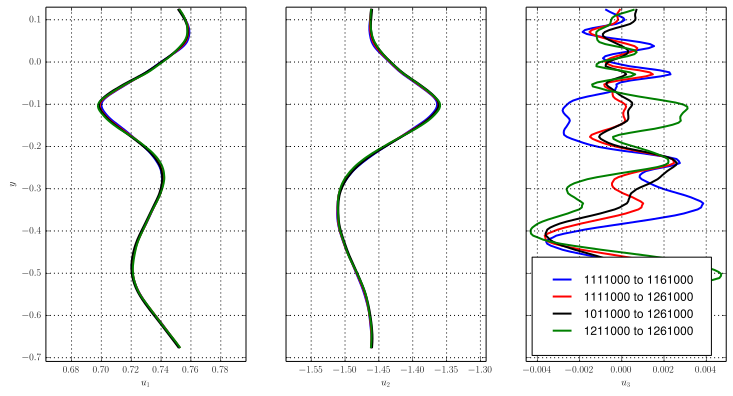

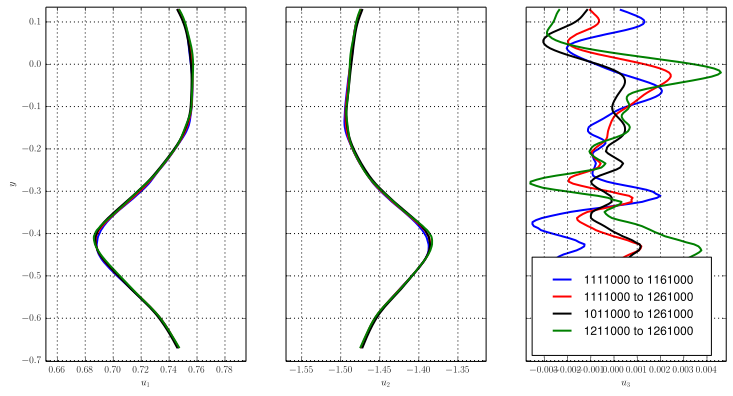

In [12]:
#Plot various wake possitions etc, change the list in plot_var to plot other quantities
pl_ids=[]
pl_ids.append(wake[0].l[0].var.get_index(101,2))
pl_ids.append(wake[0].l[0].var.get_index(101,3))
pl_ids.append(wake[0].l[0].var.get_index(101,16))
for j in range(len(wp)):
    print 'Wake profiles for x position: ',wp[j][0][0] 
    temp=wake[j].plot_var(pl_ids,1,fig_num=j)
    plt.figure(j)
    if pdf:
        plt.savefig("stat_conv_u_L2c_%i.pdf"%j) 
    elif tikz:
        tikz_save("stat_conv_u_L2c_%i.tikz"%j,
              figureheight = '\\fh',
              figurewidth = '\\fw')        

In [6]:
#Plot various wake possitions etc, change the list in plot_var to plot other quantities
plot_ids=[]
plot_ids.append(wake[0].l[0].var.get_index(208,1))
plot_ids.append(wake[0].l[0].var.get_index(208,2))

for j in range(len(wake)):
    print 'Wake profiles for x position: ',wp[j][0][0] 
    temp=wake[j].plot_var(plot_ids,1,fig_num=j)
    plt.figure(j)
    plt.savefig("stat_conv_u_DNS_%i.pdf"%j) 
    #tikz_save("stat_conv_u_Pr2_long_%i.tikz"%j,
    #          figureheight = '\\fh',
    #          figurewidth = '\\fw')       

NameError: name 'wake' is not defined

Wake profiles for x position:  -0.3
Wake profiles for x position:  0.9
Wake profiles for x position:  1.1
Wake profiles for x position:  1.26


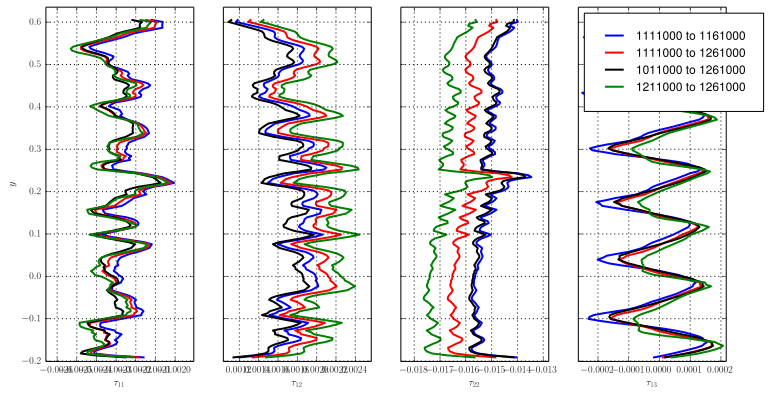

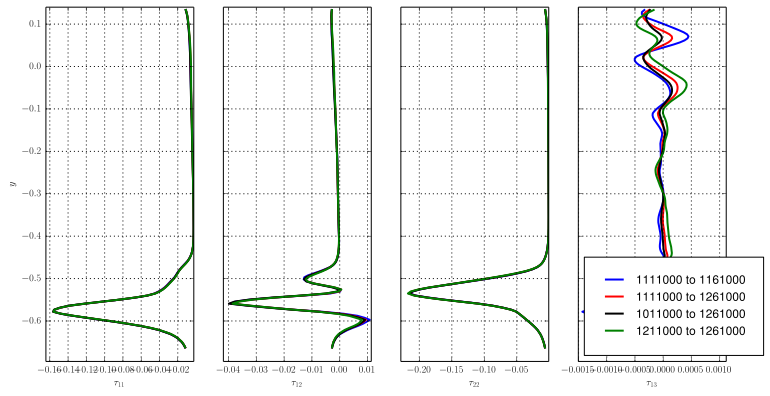

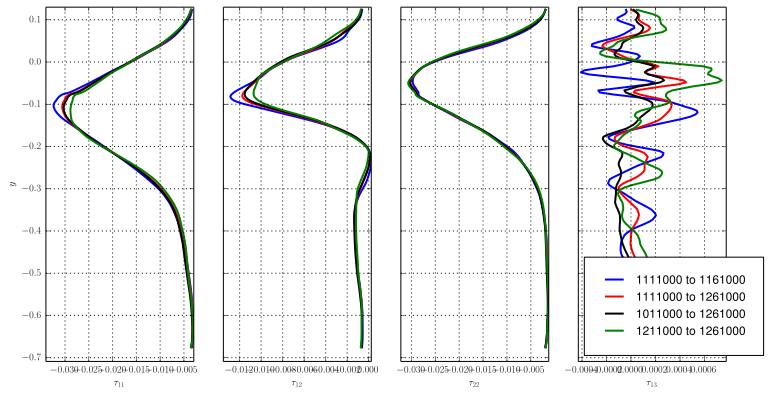

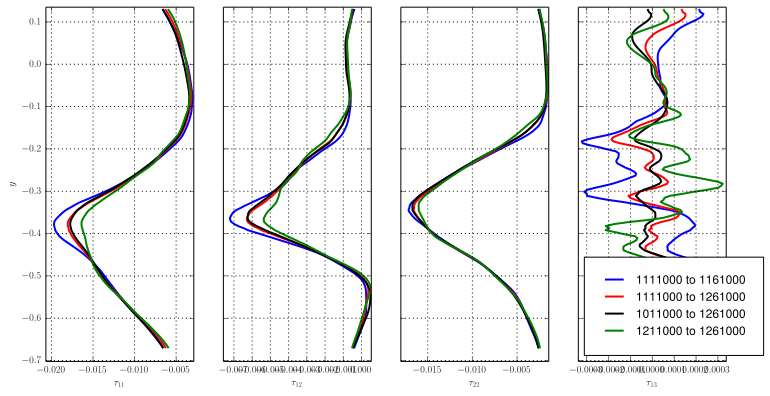

In [14]:
pl_ids=[]
pl_ids.append(wake[0].l[0].var.get_index(101,10))
pl_ids.append(wake[0].l[0].var.get_index(101,11))
pl_ids.append(wake[0].l[0].var.get_index(101,12))
pl_ids.append(wake[0].l[0].var.get_index(101,14))
for j in range(len(wp)):
    print 'Wake profiles for x position: ',wp[j][0][0] 
    temp=wake[j].plot_var(pl_ids,1,fig_num=j)
    plt.figure(j)
    if pdf:
        plt.savefig("stat_conv_tau_L2c_%i.pdf"%j) 
    elif tikz:
        tikz_save("stat_conv_tau_L2c_%i.tikz"%j,
              figureheight = '\\fh',
              figurewidth = '\\fw')   

# Monitor point trends

Analyze monitor points for one upstream and down stream position to check for trends

In [15]:
import mon_points as mp

SyntaxError: invalid syntax (mon_points.py, line 687)

In [ ]:
#USER INPUT
#change the names of the monitor points you want to have plotted.
# IT IS ASSUMED THAT THE FIRST ENTRY IS INPUT AND THE SECOND OUTPUT POSITION. 

mon_pts=['monitor_post_1.dat','monitor_post_2.dat']

#enter the number of points to use for the running average
npave = 100

In [ ]:
nmp=len(mon_pts)
n=len(postdir)
wmp=mp.mon_points()
for i in postdir:
    wmp.add_mon(mon_pts,path=i+'/')
    for j in xrange(1,nmp+1):
        wmp.mp[-j].running_ave(npave) # running average of each point
        wmp.mp[-j].comp_spec() #compute spectra of each point
        # Add any other wanted calculations here

In [ ]:
# Plot running averages for various quantities
mp_in=range(0,nmp*n,nmp)# list of in points
mp_out=range(1,nmp*n,nmp)#list of out points
print 'Inlet monitor position: ',wmp.mp[mp_in[0]].x,wmp.mp[mp_in[0]].y
print 'Outlet monitor position: ',wmp.mp[mp_out[0]].x,wmp.mp[mp_out[0]].y
print 'Pressure variaiton'
wmp.plot_var('p_rave',mp_in)
wmp.plot_var('p_rave',mp_out)
print 'U velocity variaiton'
wmp.plot_var('u_rave',mp_in)
wmp.plot_var('u_rave',mp_out)
print 'V velocity variaiton'
wmp.plot_var('v_rave',mp_in)
wmp.plot_var('v_rave',mp_out)
print 'W velocity variaiton'
wmp.plot_var('w_rave',mp_in)
wmp.plot_var('w_rave',mp_out)
print 'Power Spectral Density variaiton'
wmp.plot_psd()